In [1]:
from environment import InvertedPendulum
from es import evolution_strategy
from utils import NeuralNetwork
import numpy as np
import matplotlib.pyplot as plt

In [2]:
env = InvertedPendulum()
np.random.seed(0)

In [5]:
def plot(rewards):
    N, l, _ = rewards.shape
    for i in range(N):
        plt.plot(rewards[i, :, 0], color='blue', alpha=0.3)
    plt.plot(rewards[4, :, 0], color='red', linewidth=2)
    plt.xlabel('Iterations')
    plt.ylabel('Reward')
    plt.title('Evolution Strategy')
    plt.show()
    

(25, 59) (25, 1)
The estimated return at iteration 0 is -1556.25356686001
(25, 59) (25, 1)
The estimated return at iteration 1 is -1515.0966088522
(25, 59) (25, 1)
The estimated return at iteration 2 is -1466.7226737960393
(25, 59) (25, 1)
The estimated return at iteration 3 is -1386.5709062745038
(25, 59) (25, 1)
The estimated return at iteration 4 is -1496.125420589483
(25, 59) (25, 1)
The estimated return at iteration 5 is -1436.1737321971173
(25, 59) (25, 1)
The estimated return at iteration 6 is -1279.0376190785503
(25, 59) (25, 1)
The estimated return at iteration 7 is -1461.2839957090914
(25, 59) (25, 1)
The estimated return at iteration 8 is -1137.3566248823022
(25, 59) (25, 1)
The estimated return at iteration 9 is -1626.0430352170317
(25, 59) (25, 1)
The estimated return at iteration 10 is -1595.207637774268
(25, 59) (25, 1)
The estimated return at iteration 11 is -1264.1403204674941
(25, 59) (25, 1)
The estimated return at iteration 12 is -1456.7411615955268
(25, 59) (25, 1)

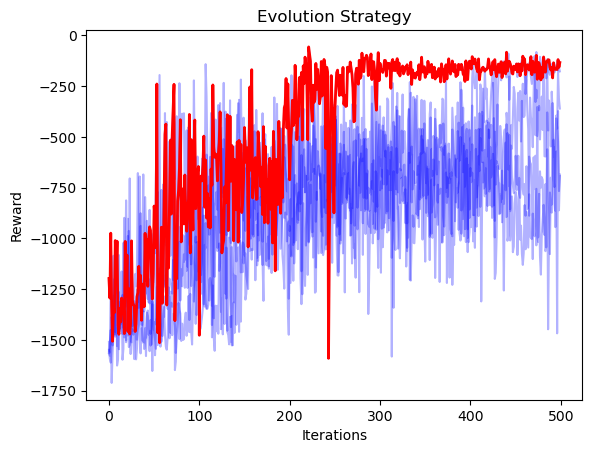

In [8]:
sigma = 0.99
alpha = 0.025
nper = 25
num_layers = 3
neurons_per_layer = np.array([2, 5, 5])
policy = NeuralNetwork(num_layers=num_layers, neurons_per_layer=neurons_per_layer)
pol, curr_reward, curr_best = evolution_strategy(environment=env, neurons_per_layer=neurons_per_layer, num_layers=num_layers, sigma=sigma, alpha=alpha, nPerturbation=nper,max_iters=500,exp_repeat=5)
plot(curr_reward)

# Exp 2

In [9]:
sigma = 0.8
alpha = 0.01
nper = 30
num_layers = 2
neurons_per_layer = np.array([4, 2])
policy = NeuralNetwork(num_layers=num_layers, neurons_per_layer=neurons_per_layer)
pol, curr_reward, curr_best = evolution_strategy(environment=env, neurons_per_layer=neurons_per_layer, num_layers=num_layers, sigma=sigma, alpha=alpha, nPerturbation=nper,max_iters=500,exp_repeat=5)
plot(curr_reward)

(30, 29) (30, 1)
The estimated return at iteration 0 is -1624.4553575105506
(30, 29) (30, 1)
The estimated return at iteration 1 is -1257.3763462000802
(30, 29) (30, 1)
The estimated return at iteration 2 is -1549.5464226007348
(30, 29) (30, 1)
The estimated return at iteration 3 is -1516.4729015728522
(30, 29) (30, 1)
The estimated return at iteration 4 is -1220.0366487688725
(30, 29) (30, 1)
The estimated return at iteration 5 is -1488.5265414821865
(30, 29) (30, 1)
The estimated return at iteration 6 is -1281.4386263121223
(30, 29) (30, 1)
The estimated return at iteration 7 is -1416.4936924906121
(30, 29) (30, 1)
The estimated return at iteration 8 is -1357.235542733877
(30, 29) (30, 1)
The estimated return at iteration 9 is -1322.9829993118171
(30, 29) (30, 1)
The estimated return at iteration 10 is -1346.951870574173
(30, 29) (30, 1)
The estimated return at iteration 11 is -1088.6670091898918
(30, 29) (30, 1)
The estimated return at iteration 12 is -1484.8892080096025
(30, 29) (3

In [23]:
sigma = 0.99
alpha = 0.025
nper = 150
num_layers = 3
neurons_per_layer = np.array([2, 5, 5])
policy = NeuralNetwork(num_layers=num_layers, neurons_per_layer=neurons_per_layer)

pol, curr_reward, curr_best = evolution_strategy(environment=env, neurons_per_layer=neurons_per_layer, num_layers=num_layers, sigma=sigma, alpha=alpha, nPerturbation=nper,max_iters=100,exp_repeat=1)
plt.figure(figsize=(10, 6))
plt.plot(curr_reward[0])
plt.xlabel('Iterations')
plt.ylabel('Reward')
plt.title('Reward vs Iterations')
plt.show()

TypeError: evolution_strategy() got an unexpected keyword argument 'neurons_per_layer'

In [7]:
def hyperparameter_tuning(nPertubations, exp_runs, num_layers, neurons_per_layer, sigma, alpha, environment, num_hyperparameter_sets):
    #pick num_hyperparameter_sets as half of the total number of hyperparameter sets
    best_reward = -np.inf
    best_hyperparameters = None
    for _ in range(num_hyperparameter_sets):
        curr_sigma = np.random.uniform(sigma[0], sigma[1])
        curr_alpha = np.random.uniform(alpha[0], alpha[1])
        curr_nPertubations = np.random.randint(nPertubations[0], nPertubations[1])
        for i in range(len(num_layers)):
            policy = NeuralNetwork(num_layers=num_layers[i], neurons_per_layer=neurons_per_layer[i])
            env = environment()
            policy, curr_reward, curr_best_reward = evolution_strategy(environment=env, policy=policy, nPerturbation=curr_nPertubations, sigma=curr_sigma, alpha=curr_alpha, exp_repeat=exp_runs, max_iters=100)
            if curr_best_reward > best_reward:
                best_reward = curr_best_reward
                best_hyperparameters = (curr_sigma, curr_alpha, curr_nPertubations, num_layers[i], neurons_per_layer[i])
            plt.figure(figsize=(10, 6))
            for run in range(1, exp_runs + 1):
                cumulative_mean_return = np.mean(curr_reward[:run], axis=0)
                plt.plot(np.arange(100),cumulative_mean_return, label=f'Avg of first {run} runs')
            plt.xlabel('Iterations')
            plt.ylabel('Average Return')
            plt.title(f'nPert={curr_nPertubations}, sigma={curr_sigma:.2f}, alpha={curr_alpha:.2f}, Layers={num_layers[i]}, Neurons={neurons_per_layer[i]}')
            plt.legend(loc='best')
            plt.tight_layout()
            plt.show()
            print(f'Hyperparameters: {curr_sigma, curr_alpha, curr_nPertubations, num_layers[i], neurons_per_layer[i]} gives best reward: {curr_best_reward}')
    return best_hyperparameters, best_reward



# Q1 Random Search Hyperparameter tuning

In [8]:
num_layers = [2, 4]
neurons_per_layer = [np.array([6,4]), np.array([9,16,8,4])]
sigma = [0.1, 0.7]
alpha = [0.01, 0.3]
nPertubations = [10,25]
exp_runs = 5
num_hyperparameter_sets = 10
best_hyperparameters, best_reward = hyperparameter_tuning(nPertubations, exp_runs, num_layers, neurons_per_layer, sigma, alpha, InvertedPendulum, num_hyperparameter_sets)

The estimated return at iteration 0 is -1269.2826141678047
The estimated return at iteration 1 is -1621.724584622622
The estimated return at iteration 2 is -1635.735731294574
The estimated return at iteration 3 is -1555.739871616172
The estimated return at iteration 4 is -1642.1596740253801
The estimated return at iteration 5 is -1628.575148431561
The estimated return at iteration 6 is -1638.2877854353005
The estimated return at iteration 7 is -1615.3549042299942
The estimated return at iteration 8 is -1653.4039732092922
The estimated return at iteration 9 is -1622.1713821571432
The estimated return at iteration 10 is -1508.6304957020384
The estimated return at iteration 11 is -1554.713508535746
The estimated return at iteration 12 is -1446.462700141368
The estimated return at iteration 13 is -1441.107818288515
The estimated return at iteration 14 is -1457.508690200651
The estimated return at iteration 15 is -1401.802581871344
The estimated return at iteration 16 is -1294.4699313067001

KeyboardInterrupt: 